<a href="https://colab.research.google.com/github/Radomir21/DigiJed_winter_course/blob/main/DigiJed_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Preprocessing

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
#імпортування бібліотек

import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df_adult_normal = pd.read_csv('/content/drive/MyDrive/Data Analyzis/adult_normal.csv')

In [4]:
df_adult_normal

,Unnamed: 0,sex,income,workclass_ Private,marital-status_ Divorced,marital-status_ Married-civ-spouse,marital-status_ Never-married,occupation_ Adm-clerical,occupation_ Craft-repair,occupation_ Exec-managerial,...,relationship_ Own-child,relationship_ Unmarried,race_ White,native-country_ United-States,fnlwgt_normalized,capital-gain_normalized,capital-loss_normalized,age_normalized,education-num_normalized,hours-per-week_normalized
0,0,1,<=50K,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.044302,0.021740,0.0,0.301370,0.800000,0.397959
1,1,1,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.048238,0.000000,0.0,0.452055,0.800000,0.122449
2,2,1,<=50K,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.138113,0.000000,0.0,0.287671,0.533333,0.397959
3,3,1,<=50K,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.151068,0.000000,0.0,0.493151,0.400000,0.397959
4,4,0,<=50K,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.221488,0.000000,0.0,0.150685,0.800000,0.397959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,32556,0,<=50K,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.166404,0.000000,0.0,0.136986,0.733333,0.377551
32557,32557,1,>50K,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.096500,0.000000,0.0,0.315068,0.533333,0.397959
32558,32558,0,<=50K,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.094827,0.000000,0.0,0.561644,0.533333,0.397959
32559,32559,1,<=50K,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.128499,0.000000,0.0,0.068493,0.533333,0.193878


In [5]:
df_adult_normal.drop(columns=['Unnamed: 0'], inplace = True)

In [6]:
df_adult_normal.head(15)

,sex,income,workclass_ Private,marital-status_ Divorced,marital-status_ Married-civ-spouse,marital-status_ Never-married,occupation_ Adm-clerical,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Other-service,...,relationship_ Own-child,relationship_ Unmarried,race_ White,native-country_ United-States,fnlwgt_normalized,capital-gain_normalized,capital-loss_normalized,age_normalized,education-num_normalized,hours-per-week_normalized
0,1,<=50K,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.044302,0.021740,0.0,0.301370,0.800000,0.397959
1,1,<=50K,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.048238,0.000000,0.0,0.452055,0.800000,0.122449
2,1,<=50K,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.138113,0.000000,0.0,0.287671,0.533333,0.397959
3,1,<=50K,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.151068,0.000000,0.0,0.493151,0.400000,0.397959
4,0,<=50K,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.221488,0.000000,0.0,0.150685,0.800000,0.397959
5,0,<=50K,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.184932,0.000000,0.0,0.273973,0.866667,0.397959
6,0,<=50K,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.100448,0.000000,0.0,0.438356,0.266667,0.153061
7,1,>50K,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.134036,0.000000,0.0,0.479452,0.533333,0.448980
8,0,>50K,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.022749,0.140841,0.0,0.191781,0.866667,0.500000
9,1,>50K,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.099947,0.051781,0.0,0.342466,0.800000,0.397959


#2) Перевірка балансу класів

In [7]:
df_adult_normal['income'].value_counts()

,count
income,
<=50K,24720
>50K,7841


Можна побачити, що класи не збалансовані.

*P.S. 'Була спроба за допомогою SMOTE() збалансувати класи, додавши в менший класс синтетичні дані, проте результати вийшли гіршими ніж на не збалансованих даних, тому було прйинято рішення залишити клас не збалансованим.'*

#3) Вибір метрики

Буду використовувати для аналізу якості моделі, так як класи не збалансовані, то основну увагу приділяємо F1-score, Precision, Recall.

# 4) Розділення даних

In [8]:
df_adult_normal["income"] = df_adult_normal["income"].apply(lambda x: 1 if x == " <=50K" else 0)

In [9]:
df_adult_normal['income'].value_counts()

,count
income,
1,24720
0,7841


In [10]:
X = df_adult_normal.drop(columns=['income'])
y = df_adult_normal['income']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5) Навчання логістичної регресії без регуляризації

In [12]:
model_Log_Reg = LogisticRegression(penalty = None, solver = 'lbfgs', max_iter=300)
model_Log_Reg.fit(X_train, y_train)
model_Log_Reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 300,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': None,
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [13]:
y_pred_test = model_Log_Reg.predict(X_test)

#6) Оцінки якості моделі

In [14]:
f1 = f1_score(y_test, y_pred_test, average='binary')
print(f"F1-score: {f1}")
precision = precision_score(y_test, y_pred_test, average='binary')
print(f"Precision: {precision}")
recall = recall_score(y_test, y_pred_test, average='binary')
print(f"Recall: {recall}")

F1-score: 0.9052281182690425
Precision: 0.8768968133535661
Recall: 0.9354512343180899


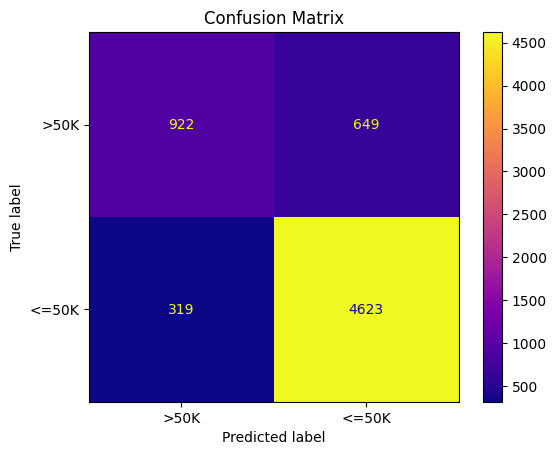

In [15]:
cm = confusion_matrix(y_test,y_pred_test)
desired_classes = ['>50K','<=50K']
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=desired_classes)
cm_display.plot(cmap='plasma')
plt.title('Confusion Matrix')
plt.show()

Подивимось на перенавчання.

In [16]:
y_pred_train = model_Log_Reg.predict(X_train)

f1 = f1_score(y_train, y_pred_train, average='binary')
print(f"F1-score: {f1}")
precision = precision_score(y_train, y_pred_train, average='binary')
print(f"Precision: {precision}")
recall = recall_score(y_train, y_pred_train, average='binary')
print(f"Recall: {recall}")

F1-score: 0.9021699244073684
Precision: 0.8739276742973601
Recall: 0.9322985134998483


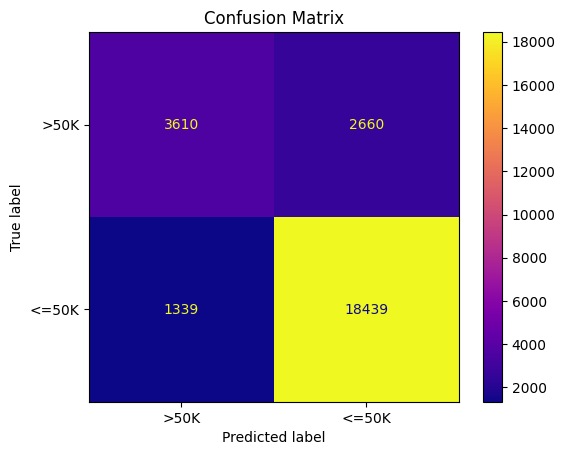

In [17]:
cm = confusion_matrix(y_train,y_pred_train)
desired_classes = ['>50K','<=50K']
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=desired_classes)
cm_display.plot(cmap='plasma')
plt.title('Confusion Matrix')
plt.show()

Як бачимо, перенавчання не має.

In [18]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.74      0.59      0.66      1571
           1       0.88      0.94      0.91      4942

    accuracy                           0.85      6513
   macro avg       0.81      0.76      0.78      6513
weighted avg       0.84      0.85      0.85      6513



In [19]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.73      0.58      0.64      6270
           1       0.87      0.93      0.90     19778

    accuracy                           0.85     26048
   macro avg       0.80      0.75      0.77     26048
weighted avg       0.84      0.85      0.84     26048



Через те, що інший клас набагато менший за перший, маємо такі результати.

#7) Оцінка якості моделі на основі перехрестної перевірки.

In [20]:
f1_scorer = make_scorer(f1_score)
precision_scorer = make_scorer(precision_score)
recall_scorer = make_scorer(recall_score)


k_folds = KFold(5, shuffle = True)

results = cross_validate(model_Log_Reg, X, y, cv=k_folds, scoring={'accuracy': 'accuracy', 'f1': f1_scorer,'precision': precision_scorer,'recall': recall_scorer}, return_train_score=True)

print(f"Точність на тесті: {results['test_accuracy'].mean()}")
print(f"Точність на трейні: {results['train_accuracy'].mean()}")
print(f"F1-score на тесті: {results['test_f1'].mean()}")
print(f"F1-score на трейні: {results['train_f1'].mean()}")
print(f"Precision на тесті: {results['test_precision'].mean()}")
print(f"Precision на трейні: {results['train_precision'].mean()}")
print(f"Recall на тесті: {results['test_recall'].mean()}")
print(f"Recall на трейні: {results['train_recall'].mean()}")

Точність на тесті: 0.8472098564164433
Точність на трейні: 0.8470793313546394
F1-score на тесті: 0.9025753302075905
F1-score на трейні: 0.902488012755574
Precision на тесті: 0.8746750103983105
Precision на трейні: 0.8746829321016634
Recall на тесті: 0.9323204973176706
Recall на трейні: 0.9321191805687989


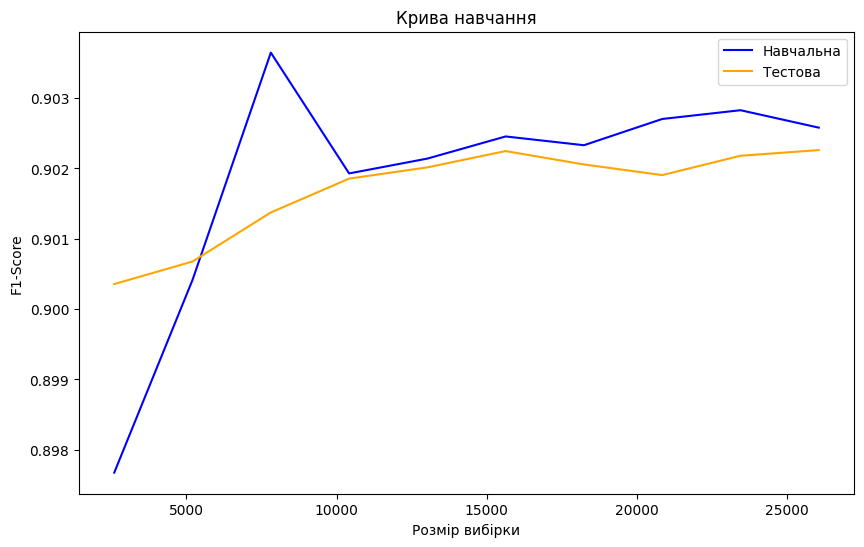

In [21]:
f1_scorer = make_scorer(f1_score)
train_sizes, train_scores, test_scores = learning_curve(model_Log_Reg, X, y, cv=k_folds, train_sizes=np.linspace(0.1, 1.0, 10), scoring=f1_scorer)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Навчальна", color="blue")
plt.plot(train_sizes, test_mean, label="Tестова", color="orange")

plt.title("Крива навчання")
plt.xlabel("Розмір вибірки")
plt.ylabel("F1-Score")
plt.legend()
plt.show()

#8) Навчання моделі з регуляризацією

*P.S. Тут вже підставлено значення С, яке ми знайшли перебором, а потім перевірили результат з 'GridSearchCV' та 'RandomizedSearchCV '*  

In [22]:
model_Log_Reg_L1 = LogisticRegression(C=1, penalty = 'l1', solver = 'liblinear')
model_Log_Reg_L1.fit(X_train, y_train)
model_Log_Reg_L1.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l1',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [23]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)                #розбиття тренувальної на навчальну та валідаційну

C_values = [0.01, 0.1, 1, 10, 100, 1000]
val_scores = []

for C in C_values:
    model = LogisticRegression(C=C, penalty='l1', solver='liblinear', random_state=42)
    model.fit(X_train_sub, y_train_sub)
    val_scores.append(f1_score(y_val, model.predict(X_val)))

optimal_C_manual = C_values[np.argmax(val_scores)]
print(f"Precision результати : {val_scores}")
print(f"Підібране C : {optimal_C_manual}")

Precision результати : [0.8861193035867186, 0.8997863662847155, 0.9003510140405616, 0.9001853839398966, 0.9001853839398966, 0.9002926829268293]
Підібране C : 1


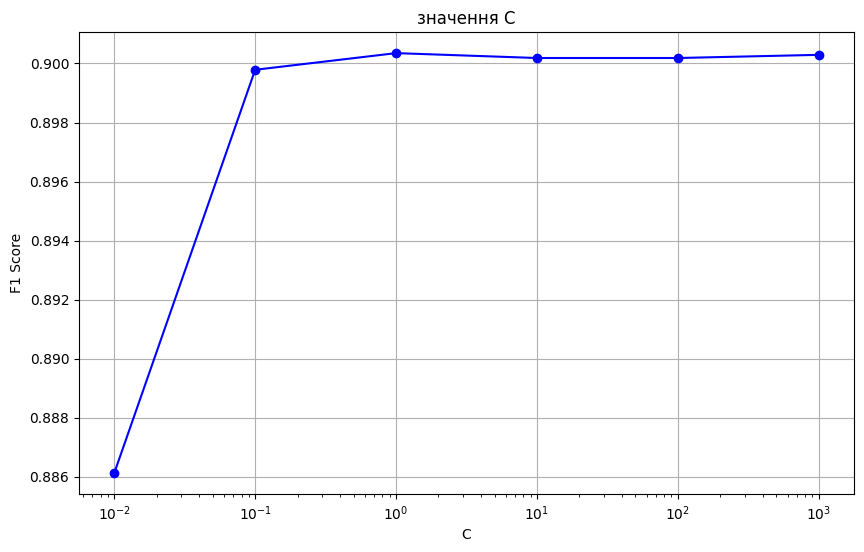

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(C_values, val_scores, marker='o', linestyle='-', color='b')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('F1 Score')
plt.title('значення C')
plt.grid()
plt.show()

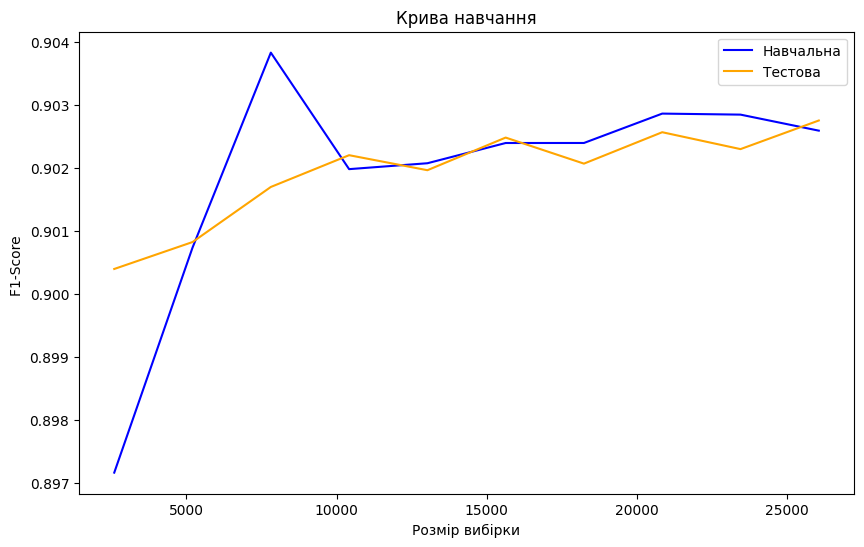

In [25]:
k_folds = KFold(5, shuffle = True)

f1_scorer = make_scorer(f1_score)
train_sizes, train_scores, test_scores = learning_curve(model_Log_Reg_L1, X, y, cv=k_folds, train_sizes=np.linspace(0.1, 1.0, 10), scoring=f1_scorer)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Навчальна", color="blue")
plt.plot(train_sizes, test_mean, label="Tестова", color="orange")

plt.title("Крива навчання")
plt.xlabel("Розмір вибірки")
plt.ylabel("F1-Score ")
plt.legend()
plt.show()

Як бачимо результати трохи кращі, але кращі.

GridSearchCV

In [26]:
k_folds = KFold(5, shuffle = True)

param_grid = {"C": np.logspace(-4, 3, 8)}
f1_scorer = make_scorer(f1_score)
grid_search = GridSearchCV(LogisticRegression(penalty='l1', solver='liblinear', random_state=42), param_grid, scoring=f1_scorer, cv=k_folds)
grid_search.fit(X_train_sub, y_train_sub)
optimal_C_grid = grid_search.best_params_["C"]
print(f"Підібране C за допомогою GridSearchCV: {optimal_C_grid}")

Підібране C за допомогою GridSearchCV: 1.0


#9) Оцінка якості моделі з регуляризацією

In [27]:
y_pred_test_l1 = model_Log_Reg_L1.predict(X_test)

In [28]:
f1 = f1_score(y_test, y_pred_test_l1, average='binary')
print(f"F1-score: {f1}")
precision = precision_score(y_test, y_pred_test_l1, average='binary')
print(f"Precision: {precision}")
recall = recall_score(y_test, y_pred_test_l1, average='binary')
print(f"Recall: {recall}")

F1-score: 0.904980917898033
Precision: 0.8762554481713094
Recall: 0.9356535815459328


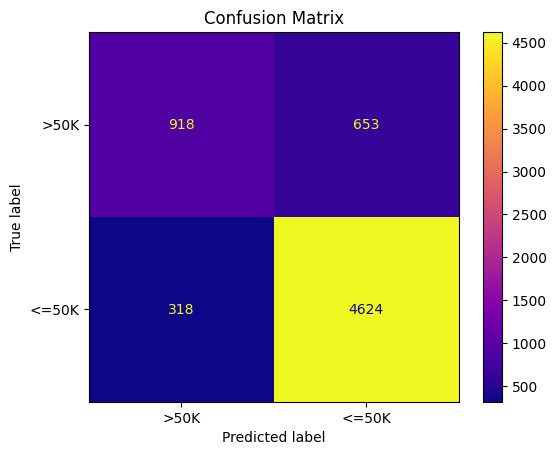

In [29]:
cm = confusion_matrix(y_test,y_pred_test_l1)
desired_classes = ['>50K','<=50K']
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=desired_classes)
cm_display.plot(cmap='plasma')
plt.title('Confusion Matrix')
plt.show()

In [30]:
y_pred_train_l1 = model_Log_Reg.predict(X_train)

f1 = f1_score(y_train, y_pred_train_l1, average='binary')
print(f"F1-score: {f1}")
precision = precision_score(y_train, y_pred_train_l1, average='binary')
print(f"Precision: {precision}")
recall = recall_score(y_train, y_pred_train_l1, average='binary')
print(f"Recall: {recall}")

F1-score: 0.9021699244073684
Precision: 0.8739276742973601
Recall: 0.9322985134998483


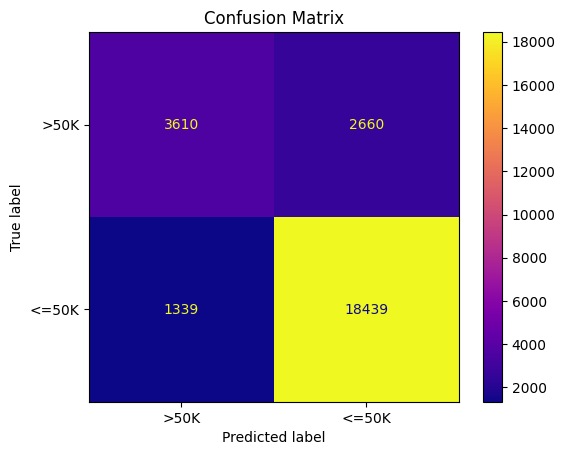

In [31]:
cm = confusion_matrix(y_train,y_pred_train_l1)
desired_classes = ['>50K','<=50K']
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=desired_classes)
cm_display.plot(cmap='plasma')
plt.title('Confusion Matrix')
plt.show()

In [32]:
print(classification_report(y_test, y_pred_test_l1))

              precision    recall  f1-score   support

           0       0.74      0.58      0.65      1571
           1       0.88      0.94      0.90      4942

    accuracy                           0.85      6513
   macro avg       0.81      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513



In [33]:
print(classification_report(y_train, y_pred_train_l1))

              precision    recall  f1-score   support

           0       0.73      0.58      0.64      6270
           1       0.87      0.93      0.90     19778

    accuracy                           0.85     26048
   macro avg       0.80      0.75      0.77     26048
weighted avg       0.84      0.85      0.84     26048



#10) Відбір ознак

In [35]:
from sklearn.feature_selection import RFE
n_features=[14,15,16,17,18]
results=[]
for i in n_features:
  model_Log_Reg_features = LogisticRegression(C=1, penalty='l1', solver='liblinear')
  rfe = RFE(model, n_features_to_select=i)
  X_train_selected = rfe.fit_transform(X_train, y_train)
  X_test_selected = rfe.transform(X_test)
  model_Log_Reg_features.fit(X_train_selected, y_train)
  y_pred_features = model_Log_Reg_features.predict(X_test_selected)
  f_score = f1_score(y_test, y_pred_features)
  results.append(f_score)
print(results)

[0.9029478013906571, 0.9030047959283547, 0.9045521292217328, 0.9044448795770511, 0.9043001273386228]


Результати майже не змінилися, проте кількість ознак значно зменшилась, тому має сенс зробити відбір ознак.

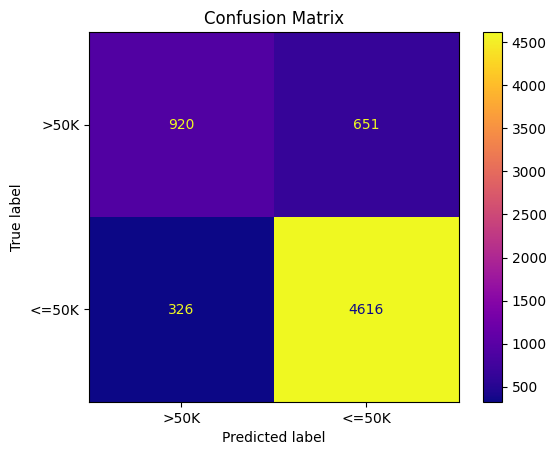

In [36]:
cm = confusion_matrix(y_test,y_pred_features)
desired_classes = ['>50K','<=50K']
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=desired_classes)
cm_display.plot(cmap='plasma')
plt.title('Confusion Matrix')
plt.show()

Результати майже не змінилися.

#11) Навчання додаткових класифікаторів XGBClassifier та RandomForestClassifier

In [54]:
xgb_model = XGBClassifier(
    random_state=42,
    learning_rate=0.01,               # Швидкість навчання
    n_estimators=200,                # Кількість дерев
    max_depth=10,                     # Максимальна глибина дерева
    min_child_weight=3,              # Мінімальна вага для поділу
    subsample=0.8,                   # Частка тренувальних даних для кожного дерева
    colsample_bytree=0.8,            # Частка ознак для кожного дерева
    gamma=0.1,                       # Мінімальний приріст в гіні
    scale_pos_weight=1              # Балансування класів

)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
f1_scorer = f1_score(y_test, y_pred_xgb)
print(f"F1-Score XGBoost: {f1_scorer}")

F1-Score XGBoost: 0.9154535814132845


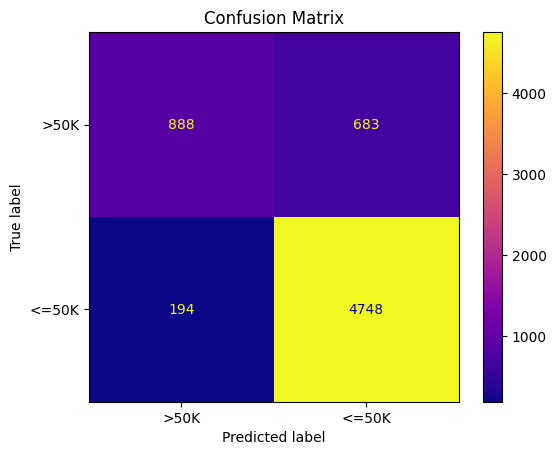

In [58]:
cm = confusion_matrix(y_test,y_pred_xgb)
desired_classes = ['>50K','<=50K']
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=desired_classes)
cm_display.plot(cmap='plasma')
plt.title('Confusion Matrix')
plt.show()

Подивимось на перенавчання.

In [55]:
y_pred_xgb_train = xgb_model.predict(X_train)
f1_scorer = f1_score(y_train, y_pred_xgb_train)
print(f"F1-Score XGBoost: {f1_scorer}")

F1-Score XGBoost: 0.9199258706587403


In [56]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.82      0.57      0.67      1571
           1       0.87      0.96      0.92      4942

    accuracy                           0.87      6513
   macro avg       0.85      0.76      0.79      6513
weighted avg       0.86      0.87      0.86      6513



In [57]:
print(classification_report(y_train,y_pred_xgb_train))

              precision    recall  f1-score   support

           0       0.84      0.58      0.68      6270
           1       0.88      0.97      0.92     19778

    accuracy                           0.87     26048
   macro avg       0.86      0.77      0.80     26048
weighted avg       0.87      0.87      0.86     26048



Перенавчання майже не має.

In [73]:
rf_model = RandomForestClassifier(
    n_estimators=100,             # Кількість дерев
    max_depth=10,                 # Максимальна глибина дерев
    min_samples_split=5,          # Мінімальна кількість зразків для поділу
    min_samples_leaf=2,           # Мінімальна кількість зразків для листа
    random_state=42               # Для відтворюваності результатів
)

rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)

f1_scorer = f1_score(y_test, y_pred_rf)
print(f"F1-Score Random Forest: {f1_scorer}")

F1-Score Random Forest: 0.9145282654833108


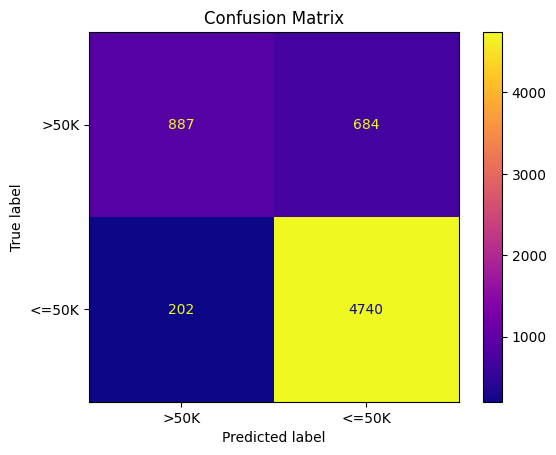

In [74]:
cm = confusion_matrix(y_test,y_pred_rf)
desired_classes = ['>50K','<=50K']
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=desired_classes)
cm_display.plot(cmap='plasma')
plt.title('Confusion Matrix')
plt.show()

In [75]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.56      0.67      1571
           1       0.87      0.96      0.91      4942

    accuracy                           0.86      6513
   macro avg       0.84      0.76      0.79      6513
weighted avg       0.86      0.86      0.85      6513



In [76]:
y_pred_rf_train = rf_model.predict(X_train)
f1_scorer = f1_score(y_train, y_pred_rf_train)
print(f"F1-Score Random Forest: {f1_scorer}")

F1-Score Random Forest: 0.9157398045163465


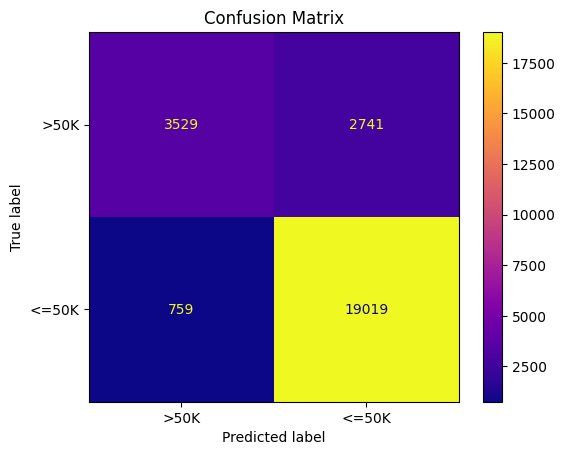

In [77]:
cm = confusion_matrix(y_train,y_pred_rf_train)
desired_classes = ['>50K','<=50K']
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=desired_classes)
cm_display.plot(cmap='plasma')
plt.title('Confusion Matrix')
plt.show()

In [78]:
print(classification_report(y_train,y_pred_rf_train))

              precision    recall  f1-score   support

           0       0.82      0.56      0.67      6270
           1       0.87      0.96      0.92     19778

    accuracy                           0.87     26048
   macro avg       0.85      0.76      0.79     26048
weighted avg       0.86      0.87      0.86     26048



Перенавчання майже не має.

#12) Порівняння класифікаторів

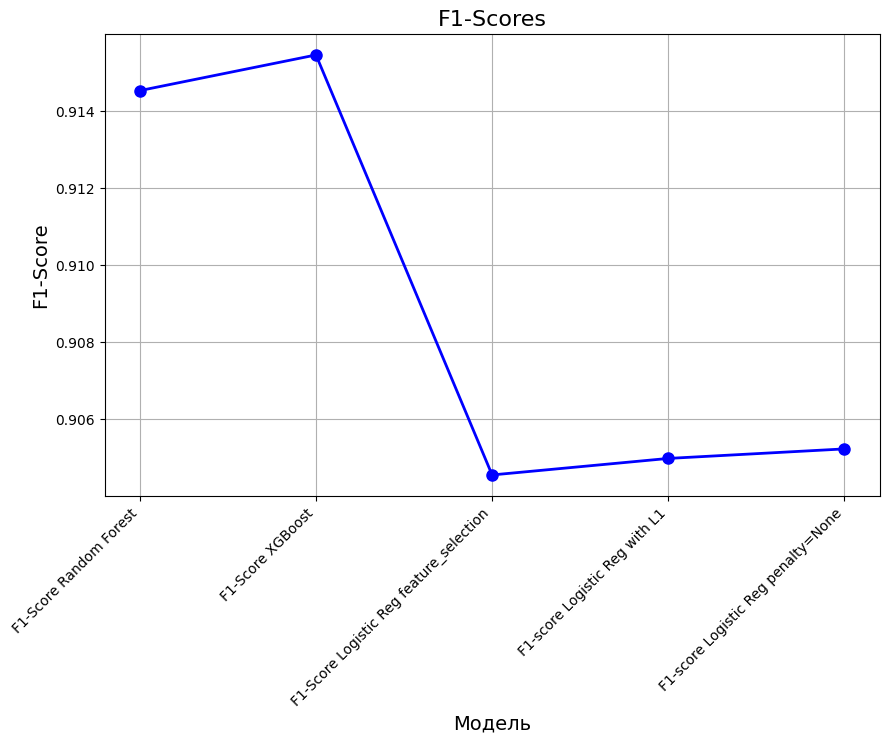

In [79]:
results = {'F1-Score Random Forest': 0.9145282654833108,
           'F1-Score XGBoost': 0.9154535814132845,
           'F1-Score Logistic Reg feature_selection': 0.9045521292217328,
           'F1-score Logistic Reg with L1':  0.904980917898033,
           'F1-score Logistic Reg penalty=None': 0.9052281182690425
           }

plt.figure(figsize=(10, 6))
plt.plot(results.keys(), results.values(), marker='o', color='b', linestyle='-', linewidth=2, markersize=8)

plt.title('F1-Scores', fontsize=16)
plt.xlabel('Модель', fontsize=14)
plt.ylabel('F1-Score', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()


XGBoost демонструє найкращий результат, що свідчить про його високу ефективність у складних задачах класифікації.
Random Forest має схожий результат, однак може потребувати більше часу на навчання і більше ресурсів.
Logistic Regression з L1-регуляризацією та без регуляризації дає результат, близькі результати.
Застосування відбору ознак для Logistic Regression дає не такі добрі результати порівнюючи з іншими моделями.
Отже, для більш складних наборів даних і задач класифікації XGBoost та Random Forest є кращими варіантами, тоді як Logistic Regression підходить для швидких і простих задач.